In [1]:
import os 
import sys
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_1 = np.load('/content/drive/MyDrive/AtomfinderProject/Data/AtomAI_Generality/1/Augtrainset.npz')
images_1 = dataset_1['X_train']
labels_1 = dataset_1['y_train']
images_test_1 = dataset_1['X_test']
labels_test_1 = dataset_1['y_test']
print(images_1.shape, labels_1.shape)

dataset_2 = np.load('/content/drive/MyDrive/AtomfinderProject/Data/AtomAI_Generality/2/Augtrainset.npz')
images_2 = dataset_2['X_train']
labels_2 = dataset_2['y_train']
images_test_2 = dataset_2['X_test']
labels_test_2 = dataset_2['y_test']
print(images_2.shape, labels_2.shape)

dataset_3 = np.load('/content/drive/MyDrive/AtomfinderProject/Data/AtomAI_Generality/3/Augtrainset.npz')
images_3 = dataset_3['X_train']
labels_3 = dataset_3['y_train']
images_test_3 = dataset_3['X_test']
labels_test_3 = dataset_3['y_test']
print(images_3.shape, labels_3.shape)

dataset_4 = np.load('/content/drive/MyDrive/AtomfinderProject/Data/AtomAI_Generality/4/Augtrainset.npz')
images_4 = dataset_4['X_train']
labels_4 = dataset_4['y_train']
images_test_4 = dataset_4['X_test']
labels_test_4 = dataset_4['y_test']
print(images_4.shape, labels_4.shape)

dataset_5 = np.load('/content/drive/MyDrive/AtomfinderProject/Data/AtomAI_Generality/5/Augtrainset.npz')
images_5 = dataset_5['X_train']
labels_5 = dataset_5['y_train']
images_test_5 = dataset_5['X_test']
labels_test_5 = dataset_5['y_test']
print(images_5.shape, labels_5.shape)

(239, 1, 256, 256) (239, 1, 256, 256)
(239, 1, 256, 256) (239, 1, 256, 256)
(239, 1, 256, 256) (239, 1, 256, 256)
(239, 1, 256, 256) (239, 1, 256, 256)
(239, 1, 256, 256) (239, 1, 256, 256)


In [ ]:
a = np.vstack()

In [ ]:
data ={
    "labels":[],
    "imgs":[],
    }

data['labels'] = np.vstack((labels_1,labels_test_1,
                            labels_2,labels_test_2,
                            labels_3,labels_test_3,
                            labels_4,labels_test_4,
                            labels_5,labels_test_5))[:,0,:,:]
data['imgs'] = np.vstack((images_1,images_test_1,
                          images_2,images_test_2,
                          images_3,images_test_3,
                          images_4,images_test_4,
                          images_5,images_test_5,))[:,0,:,:]
data['imgs'].shape,data['labels'].shape

((1495, 256, 256), (1495, 256, 256))

## Create groups and datasets from the stacked data

In [ ]:
types = ['labels','imgs']
f = h5py.File('/content/drive/MyDrive/AtomfinderProject/FoundryPublish/dataset/AtomaiTraining.h5', 'w')
for t in types:
    print(f"=== Creating Group {t} ===")
    f.create_group(t)
    
    for i, d in enumerate(data[t]):
        f.create_dataset(f'{t}/{i:04}', data=d)
f.close()

=== Creating Group labels ===
=== Creating Group imgs ===


# Test and View Dataset Shape

In [ ]:
f = h5py.File('/content/drive/MyDrive/AtomfinderProject/FoundryPublish/dataset/AtomaiTraining.h5', 'r')
key_list = list(f['imgs'].keys())

f.keys()

<KeysViewHDF5 ['imgs', 'labels']>

In [ ]:
f['imgs'][key_list[0]]

<HDF5 dataset "0000": shape (256, 256), type "<f8">

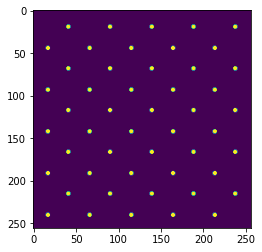

In [ ]:
plt.imshow(f['labels'][key_list[6]])

# Publish to Foundry

In [1]:
data_source = "https://app.globus.org/file-manager?origin_id=4e056118-f39e-11ea-8197-0e2f230cc907&origin_path=%2FD%2FAtomfinder%2Ffoundrypublish%2F"

In [2]:
metadata = {
    "short_name": "wei_atom_locating_train",
    "data_type": "hdf5",
    'task_type': ['supervised'],
    'domain': ['materials science'],
    'n_items': 1495,
    'splits': [
        {'label': 'train', 'path': 'AtomaiTraining.h5', 'type': 'train'},
    ],
    "keys":[
        {
            "key": ["imgs"],
            "type": "input",
            "description": "input, unlabeled images, covering 5 different crystal lattices (SrTiO3[100], SrTiO3[110], WS2[0001], Si[110], and DyScO3[110]) and various image quality"
        },
        {
            "key": ["labels"],
            "type": "target",
            "description": "sepal width in unit(cm)"
        },
        {
            "key": ["petal length (cm)"],
            "type": "input",
            "units": "cm",
            "description": "label, binary mask at atomic column positions"
        },
    ],    
}

In [3]:
# full title of dataset
title = "Training Dataset for Locating Atoms in STEM images "

# authors to list 
authors = ["Jingrui Wei", "Ben Blaiszik", "Dane Morgan", "Paul M Voyles"]

# publication year (optional)
# The default is the current calendar year
publication_year = 2022


In [4]:
!pip install foundry_ml
#!pip install mdf_connect_client
#!pip install dlhub-sdk==0.10.2
!pip freeze

  Using cached json2table-1.1.5-py2.py3-none-any.whl (8.7 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.4
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1626085644852/work
anyio @ file:///C:/ci/anyio_1620153135622/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
arrow @ file:///C:/ci/arrow_1617738834352/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1629829318700/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754a

In [8]:
from foundry import Foundry
f = Foundry(no_browser=True, no_local_server=True)

res = f.publish(metadata, data_source, title, authors, update=True)


[NON-CRITICAL] Off_process_checker instantiation failed. Continuing...
Traceback (most recent call last):
  File "G:\anaconda3\lib\site-packages\funcx\serialize\facade.py", line 32, in __init__
    port = self._start_off_process_checker()
  File "G:\anaconda3\lib\site-packages\funcx\serialize\facade.py", line 58, in _start_off_process_checker
    std_out = open(std_file, "w")
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/35841e9a-e6a5-4051-b9f3-937086707ea6'


In [9]:
res

{'source_id': 'training_locating_atoms_stem_images_v1.2',
 'success': True,
 'error': None,
 'status_code': 202}

In [10]:
source_id = res['source_id']
f.check_status(source_id=source_id)


Status of submission training_locating_atoms_stem_images_v1.1 (Training Dataset for Locating Atoms in STEM images )
Submitted by JINGRUI WEI at 2022-05-17T17:38:21.251060Z

Submission initialization was successful.
Cancellation of previous submissions was not requested or required.
Connect data download failed: GlobusError("Path '/D/Atomfinder/foundrypublish/' not found on endpoint '4e056118-f39e-11ea-8197-0e2f230cc907'",).
Data transfer to primary destination was cancelled.
Metadata extraction was cancelled.
Dataset curation was cancelled.
MDF Search ingestion was cancelled.
Data transfer to secondary destinations was cancelled.
MDF Publish publication was cancelled.
Citrine upload was cancelled.
Materials Resource Registration was cancelled.
Post-processing cleanup was cancelled.

This submission is no longer processing.



In [ ]:
from foundry import Foundry
f = Foundry(no_browser=True, no_local_server=True)
f.check_status(source_id='_test_training_locating_atoms_stem_images_v1.1')


Please paste the following URL in a browser:
https://auth.globus.org/v2/oauth2/authorize?client_id=984464e2-90ab-433d-8145-ac0215d26c8e&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=urn%3Aglobus%3Aauth%3Ascope%3Adata.materialsdatafacility.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2Fc17f27bb-f200-486a-b785-2a25e82af505%2Fconnect+urn%3Aglobus%3Aauth%3Ascope%3Asearch.api.globus.org%3Asearch+https%3A%2F%2Fauth.globus.org%2Fscopes%2F56ceac29-e98a-440a-a594-b41e7a084b62%2Fall+urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+https%3A%2F%2Fauth.globus.org%2Fscopes%2F81fc4156-a623-47f2-93ad-7184118226ba%2Fauth+openid+https%3A%2F%2Fauth.globus.org%2Fscopes%2Ffacd7ccc-c5f4-42aa-916b-a0e270e2c2a9%2Fall&state=_default&response_type=code&code_challenge=AVLcupJ_qAJGawifzJWvvBRqqpxM89k34lhOPBOXO9o&code_challenge_method=S256&access_type=offline&prefill_named_grant=Foundry+Login
Please Paste your Auth Code Below: 
cXlaquaAt1xB4bYHC7S0P2TUoc6hig

Status of TEST